In [58]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import random
# from sklearn import neighbors

# 读取数据并显示
data = pd.read_csv('Titanic.csv')
print(data.info())
print(data.head())  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB
None
   PassengerId  Survived  Pclass  \
0            1         0       3   
1            2         1       1   
2            3         1       3   
3            4         1       1   
4            5         0       3   

                      

In [59]:
# 先判断各项特征中是否有缺失
print(data.isnull().any(axis=0))
# 统计各项特征中缺失的数量
print(data.isnull().sum(axis=0))
# 统计各变量中缺失值的比例——对于缺失很多的特征，下面将采取直接删除的方式进行处理
print(data.isnull().sum(axis = 0)/data.shape[0])

PassengerId    False
Survived       False
Pclass         False
Name           False
Sex            False
Age             True
SibSp          False
Parch          False
Ticket         False
Fare           False
Cabin           True
Embarked        True
dtype: bool
PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64
PassengerId    0.000000
Survived       0.000000
Pclass         0.000000
Name           0.000000
Sex            0.000000
Age            0.198653
SibSp          0.000000
Parch          0.000000
Ticket         0.000000
Fare           0.000000
Cabin          0.771044
Embarked       0.002245
dtype: float64


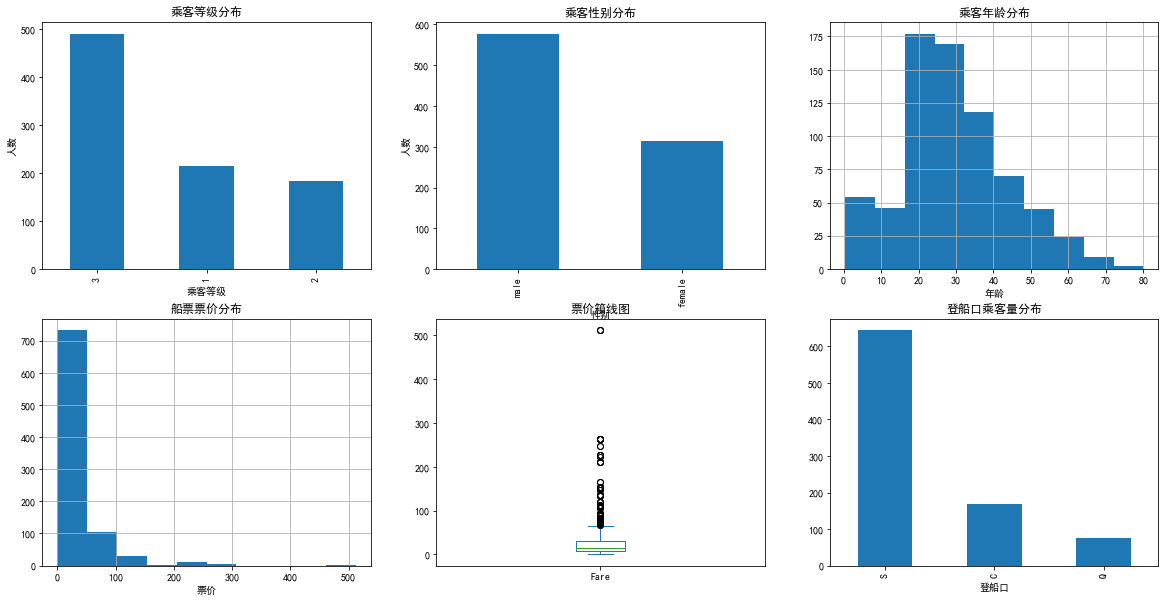

In [60]:
# 绘图
import matplotlib.pyplot as plt
import seaborn
# 显示中文标题
plt.rcParams['font.sans-serif'] = ['SimHei']
plt.rcParams['axes.unicode_minus'] = False

fig = plt.figure(figsize=(20,10))
# 乘客等级分布
plt.subplot2grid((2, 3), (0, 0))
data['Pclass'].value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.xlabel('乘客等级')
plt.title('乘客等级分布')

# 乘客性别分布
plt.subplot2grid((2, 3), (0, 1))
data['Sex'].value_counts().plot(kind='bar')
plt.ylabel('人数')
plt.xlabel('性别')
plt.title('乘客性别分布')

# 乘客的年龄分布
plt.subplot2grid((2, 3), (0, 2))
data['Age'].hist()
plt.xlabel('年龄')
plt.title('乘客年龄分布')

# 票价的分布
plt.subplot2grid((2, 3), (1, 0))
data['Fare'].hist()
plt.xlabel('票价')
plt.title('船票票价分布')

# 箱线图：票价的异常情况探查
plt.subplot2grid((2, 3), (1, 1))
data['Fare'].plot(kind='box')
plt.title('票价箱线图')

# 登船港口的分布情况
plt.subplot2grid((2, 3), (1, 2))
data['Embarked'].value_counts().plot(kind='bar')
plt.xlabel('登船口')
plt.title('登船口乘客量分布')
plt.show()

In [61]:
# 对堂兄弟妹个数以及父母子女个数的获救情况进行统计
SibspCnt = data.groupby(['SibSp', 'Survived'])
dfSibSp = pd.DataFrame(SibspCnt.count()['PassengerId'])
dfSibSp.rename(columns={'PassengerId':'count'}, inplace=True)
print(dfSibSp)
print('\n')

ParchCnt= data.groupby(['Parch', 'Survived'])
dfParch = pd.DataFrame(ParchCnt.count()['PassengerId'])
dfParch.rename(columns={'PassengerId': 'count'}, inplace=True)
print(dfParch)

                count
SibSp Survived       
0     0           395
      1           213
1     0            98
      1           111
2     0            15
      1            13
3     0            12
      1             4
4     0            15
      1             3
5     0             5
8     0             7


                count
Parch Survived       
0     0           443
      1           235
1     0            53
      1            65
2     0            40
      1            40
3     0             2
      1             3
4     0             4
5     0             4
      1             1
6     0             1


删除相关性较小的SibSp和Parch特征

In [62]:
data.drop(labels='SibSp',axis=1,inplace=True)
data.drop(labels='Parch',axis=1,inplace=True)

In [63]:
PriceCnt = data.groupby(['Fare', 'Survived'])
dfFare = pd.DataFrame(PriceCnt.count()['PassengerId'])
dfFare.rename(columns={'PassengerId':'count'}, inplace=True)
print(dfFare)

                   count
Fare     Survived       
0.0000   0            14
         1             1
4.0125   0             1
5.0000   0             1
6.2375   0             1
...                  ...
247.5208 1             1
262.3750 1             2
263.0000 0             2
         1             2
512.3292 1             3

[330 rows x 1 columns]


由上述统计信息，下面将直接删除缺失严重的Cabin特征，再删除一些对分类无关紧要的特征，最后考虑到Embbarked特征只有两个缺失，考虑直接删去有缺失的两条数据（注：除Embarked外其余特征删除均是删除列）

In [64]:
# 对缺失项的删除操作
data.drop(labels='Fare',axis=1,inplace=True)        # 删除特征较分散的Fare特征
data.drop(labels='Cabin',axis=1,inplace=True)       # 删除缺失严重的Cabin特征

data.drop(['PassengerId','Ticket','Name'],axis=1,inplace=True)      # 删除无关紧要的特征
print(data.info())
print(data.head())   
# 删除缺失行，根据Embarked变量，删除对应的缺失行
data.dropna(subset=['Embarked'], inplace=True)
 
print(data.isnull().sum())  #打印各个特征值的空值总和

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  891 non-null    int64  
 1   Pclass    891 non-null    int64  
 2   Sex       891 non-null    object 
 3   Age       714 non-null    float64
 4   Embarked  889 non-null    object 
dtypes: float64(1), int64(2), object(2)
memory usage: 34.9+ KB
None
   Survived  Pclass     Sex   Age Embarked
0         0       3    male  22.0        S
1         1       1  female  38.0        C
2         1       3  female  26.0        S
3         1       1  female  35.0        S
4         0       3    male  35.0        S
Survived      0
Pclass        0
Sex           0
Age         177
Embarked      0
dtype: int64


In [65]:
# 把Sex中的字符全部换为0和1表示
class_mapping = {'male':1, 'female':0}
data['Sex'] = data['Sex'].map(class_mapping)
data

,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,S
1,1,1,0,38.0,C
2,1,3,0,26.0,S
3,1,1,0,35.0,S
4,0,3,1,35.0,S
...,...,...,...,...,...
886,0,2,1,27.0,S
887,1,1,0,19.0,S
888,0,3,0,NaN,S
889,1,1,1,26.0,C


In [66]:
# 统计Embarked中的不同内容数量，也将其转换为数字
print(pd.value_counts(data['Embarked']))
print("#########################################################")
# 把Embarked中的字符全部换为数字表示
class_mapping = {'S':1, 'C':2, 'Q': 3}
data['Embarked'] = data['Embarked'].map(class_mapping)
data

S    644
C    168
Q     77
Name: Embarked, dtype: int64
#########################################################


,Survived,Pclass,Sex,Age,Embarked
0,0,3,1,22.0,1
1,1,1,0,38.0,2
2,1,3,0,26.0,1
3,1,1,0,35.0,1
4,0,3,1,35.0,1
...,...,...,...,...,...
886,0,2,1,27.0,1
887,1,1,0,19.0,1
888,0,3,0,NaN,1
889,1,1,1,26.0,2


# ReadMe
注：如需更换对于缺失值的填充处理操作，请先重新运行上面的代码，并忽略下面的cell直接运行下一个cell更换新的填充数据方法

In [67]:
# 对年龄这一重要特征量的填充操作，这里随机选取所有人年龄的中位数、平均数或者众数来填补年龄数据中的缺失值

# print(data.Age)
# print(data.Age.describe())
# print("年龄的中位数是：",data.Age.median())
# print("年龄的均值是：",data.Age.mean())
age_median = data.Age.median()
age_mean = data.Age.mean()
age_mode = data.Age.mode()[0]

"""
print('#############################')
print(age_mode, age_mean, age_median)
print('#############################')
"""

fill_list = [age_mean, age_median, age_mode]
fill = random.choice(fill_list)
data.Age.fillna(fill, inplace=True)
# print(data.Age.describe())
print(data.Age)

# 现在再次检查填充之后的数据信息
print(data.info())

0      22.0
1      38.0
2      26.0
3      35.0
4      35.0
       ... 
886    27.0
887    19.0
888    24.0
889    26.0
890    32.0
Name: Age, Length: 889, dtype: float64
<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Survived  889 non-null    int64  
 1   Pclass    889 non-null    int64  
 2   Sex       889 non-null    int64  
 3   Age       889 non-null    float64
 4   Embarked  889 non-null    int64  
dtypes: float64(1), int64(4)
memory usage: 41.7 KB
None


# 不同的填充操作 
# 利用KNN进行缺失值预测

In [68]:
'''
from sklearn import neighbors
# 将数据拆分为两组，分别为年龄缺失组和年龄非缺失组
missing = data.loc[data.Age.isnull(),]
nomissing = data.loc[~data.Age.isnull(),]
 
# 通过KNN模型对缺失值进行预测
# 提取出所有的自变量
X = nomissing.columns[nomissing.columns != 'Age']
# 构建模型,K近邻（回归）模型
knn = neighbors.KNeighborsRegressor()
# 模型拟合
knn.fit(nomissing[X], nomissing.Age)
# 年龄预测
pred_age = knn.predict(missing[X])
data.loc[data.Age.isnull(),'Age'] = pred_age
print(data)
'''

"\nfrom sklearn import neighbors\n# 将数据拆分为两组，分别为年龄缺失组和年龄非缺失组\nmissing = data.loc[data.Age.isnull(),]\nnomissing = data.loc[~data.Age.isnull(),]\n \n# 通过KNN模型对缺失值进行预测\n# 提取出所有的自变量\nX = nomissing.columns[nomissing.columns != 'Age']\n# 构建模型,K近邻（回归）模型\nknn = neighbors.KNeighborsRegressor()\n# 模型拟合\nknn.fit(nomissing[X], nomissing.Age)\n# 年龄预测\npred_age = knn.predict(missing[X])\ndata.loc[data.Age.isnull(),'Age'] = pred_age\nprint(data)\n"

In [69]:
# 将年龄分段，小于等于18岁的为0，大于等于60岁的为2，其余为1
data['Age'].loc[data['Age'] <= 18] = 0
# 先把大于60的赋值改掉，这样在下一步检测大于18的部分会自动忽略大于60的，因其已被赋值为2
data['Age'].loc[data['Age'] >= 60] = 2
data['Age'].loc[data['Age'] > 18 ] = 1

C:\Users\ASUS\AppData\Local\Temp\ipykernel_27232\887150721.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].loc[data['Age'] <= 18] = 0
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27232\887150721.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].loc[data['Age'] >= 60] = 2
C:\Users\ASUS\AppData\Local\Temp\ipykernel_27232\887150721.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['Age'].loc[data['Age'] 

In [70]:
col = data.columns.values.tolist()
col.remove('Survived')
X = data[col].copy()
y = data['Survived']
data = pd.concat([X, y], axis=1).astype(dtype=int)

train_data = data[ : 770]
train_data.to_csv('TrainData.csv',index=False)
test_data = data[770 : 880]
test_data.to_csv('TestData.csv', index=False)
data

,Pclass,Sex,Age,Embarked,Survived
0,3,1,1,1,0
1,1,0,1,2,1
2,3,0,1,1,1
3,1,0,1,1,1
4,3,1,1,1,0
...,...,...,...,...,...
886,2,1,1,1,0
887,1,0,1,1,1
888,3,0,1,1,0
889,1,1,1,2,1
